<a href="https://colab.research.google.com/github/estermmorales/escalonamento/blob/main/Algoritmos_de_Escalonamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import threading
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Classe que representa o processo
class Processo:

    def __init__(self, id, chegada, cpu, prioridade):
        self.id = id
        self.chegada = chegada
        self.cpu = cpu
        self.prioridade = prioridade

    def get_cpu(self):
        return self.cpu
    
    def get_chegada(self):
        return self.chegada

    def get_prioridade(self):
      return self.prioridade
    
    def get_id(self):
        return self.id

In [ ]:
# Classe que representa a fila de aptos
class FilaAptos:

    listaProcessos = []

    def __init__(self):
        pass

    def insere_processo(self, processo):
        self.listaProcessos.append(processo)

    def mostra_dados_processo(self, posicao):
        print(f'Identificacao: {self.listaProcessos[posicao].get_id()}')
        print(f'Chegada......: {self.listaProcessos[posicao].get_chegada()}')
        print(f'CPU..........: {self.listaProcessos[posicao].get_cpu()}')
        print(f'Prioridade...: {self.listaProcessos[posicao].get_prioridade()}\n')

    def get_proximo_processo(self):
        return self.listaProcessos.pop(0)

    def mostra_processos_lista(self):
        for i in range(len(self.listaProcessos)):
            self.mostra_dados_processo(i)

    def tamanho_lista(self):
        return len(self.listaProcessos)

    def ordenar_por_cpu(self):
        self.listaProcessos = sorted(self.listaProcessos, key=lambda Processo:Processo.cpu)
    
    def ordenar_por_prioridade(self):
        self.listaProcessos = sorted(self.listaProcessos, key=lambda Processo:Processo.prioridade)

In [ ]:
# Thread algoritmo FCFS
class threadFCFS(threading.Thread):

    tempo_relogio = 0
    media = 0.0

    def __init__(self, fila_aptos):
        self.fila_aptos = fila_aptos
        threading.Thread.__init__(self)

    def escalonar(self):
        qtd_processos = self.fila_aptos.tamanho_lista()
        
        for i in range(qtd_processos):
            proc = self.fila_aptos.get_proximo_processo()
            self.tempo_relogio += proc.get_cpu()
            
        media = (self.tempo_relogio - proc.get_cpu()) / qtd_processos
        return media

    def run(self):
        print('Algoritmo FCFS')
        self.media = self.escalonar()
        print(f'Media de espera: {self.media:.2f}')

In [ ]:
# Thread algoritmo SJF (SHORTEST JOB FIRST)
class threadSJF(threading.Thread):

    tempo_relogio = 0
    media = 0.0

    def __init__(self, fila_aptos):
        self.fila_aptos = fila_aptos
        threading.Thread.__init__(self)

    def escalonar(self):
        self.fila_aptos.ordenar_por_cpu()
        qtd_processos = self.fila_aptos.tamanho_lista()
        
        for i in range(qtd_processos):
            proc = self.fila_aptos.get_proximo_processo()
            self.tempo_relogio += proc.get_cpu()

        media = (self.tempo_relogio - proc.get_cpu()) / qtd_processos
        return media

    def run(self):
        print('\nAlgoritmo SJF')
        self.media = self.escalonar()
        print(f'Media de espera: {self.media:.2f}')

In [ ]:
# Thread algoritmo baseado em PRIORIDADE
class threadPrioridade(threading.Thread):

    tempo_relogio = 0
    media = 0.0

    def __init__(self, fila_aptos):
        self.fila_aptos = fila_aptos
        threading.Thread.__init__(self)

    def escalonar(self):
        self.fila_aptos.ordenar_por_prioridade()
        qtd_processos = self.fila_aptos.tamanho_lista()
        
        for i in range(qtd_processos):
            proc = self.fila_aptos.get_proximo_processo()
            self.tempo_relogio += proc.get_cpu()

        media = (self.tempo_relogio - proc.get_cpu()) / qtd_processos
        return media

    def run(self):
        print('\nAlgoritmo baseado em PRIORIDADE')
        self.media = self.escalonar()
        print(f'Media de espera: {self.media:.2f}\n')

In [ ]:
# Funcao principal
def main():

    medias = []
    lista_processos = []
    
    #Lê o arquivo csv, cria os processos e adiciona na lista
    processos = pd.read_csv('processo.csv')
    for i in range(len(processos.index)):
      #                                         Id                 Chegada              CPU                 Prioridade
      lista_processos.append(Processo(processos.iloc[i][0], processos.iloc[i][1], processos.iloc[i][2], processos.iloc[i][3]))
      
    #Cria e mostra processos na fila de aptos
    f_aptos = FilaAptos()
    for i in lista_processos:
      f_aptos.insere_processo(i)

    f_aptos.mostra_processos_lista()

    #Roda Algoritmo FCFS
    fcfs = threadFCFS(f_aptos)
    fcfs.start()
    fcfs.join()

    #Popula fila de aptos novamente e roda Algoritmo SJF
    for i in lista_processos:
      f_aptos.insere_processo(i)

    sjf = threadSJF(f_aptos)
    sjf.start()
    sjf.join()
    
    #Popula fila de aptos novamente e roda Algoritmo de Prioridade
    for i in lista_processos:
      f_aptos.insere_processo(i)

    prioridade = threadPrioridade(f_aptos)
    prioridade.start()
    prioridade.join()
    
    #Mostra gráfico das médias
    medias.append(fcfs.media)
    medias.append(sjf.media)
    medias.append(prioridade.media)

    faixa = [medias[0], medias[1], medias[2]]
    algoritmos = ['FCFS', 'SJF', 'Prioridade']
    plt.bar(algoritmos, faixa, color="red")

    plt.show()

Identificacao: 1
Chegada......: 1
CPU..........: 1
Prioridade...: 1

Identificacao: 2
Chegada......: 5
CPU..........: 2
Prioridade...: 2

Identificacao: 3
Chegada......: 7
CPU..........: 8
Prioridade...: 3

Identificacao: 4
Chegada......: 4
CPU..........: 4
Prioridade...: 4

Identificacao: 5
Chegada......: 5
CPU..........: 3
Prioridade...: 5

Identificacao: 6
Chegada......: 6
CPU..........: 5
Prioridade...: 6

Identificacao: 7
Chegada......: 2
CPU..........: 6
Prioridade...: 8

Identificacao: 8
Chegada......: 3
CPU..........: 7
Prioridade...: 3

Algoritmo FCFS
Media de espera: 3.62

Algoritmo SJF
Media de espera: 3.50

Algoritmo baseado em PRIORIDADE
Media de espera: 3.75



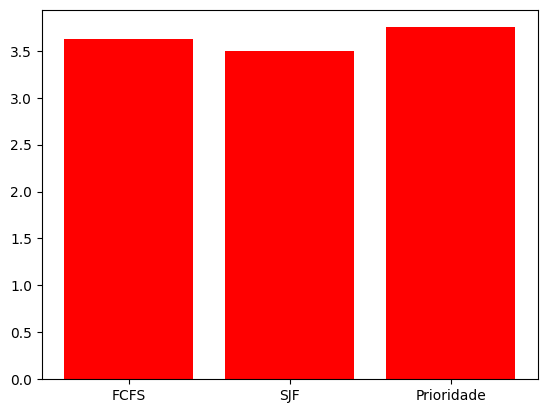

In [ ]:
main()